In [9]:
import xlrd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
wb = xlrd.open_workbook('data/sc_grimmbamspecs.xlsx')

In [11]:
st = wb.sheet_by_index(0)

In [12]:
df = pd.read_excel('data/sc_grimmbamspecs.xlsx', parse_cols=[0,1,2,4,5,6,8,9,10,12,13,14,16,17])
col_names = dict(zip(df.columns,['speck1time','speck1count','speck1mass','speck2time','speck2count','speck2mass','speck3time','speck3count','speck3mass','grimmtime','grimmmass','grimmcount','bamtime','bampm2.5']))
df.rename(columns=col_names, inplace=True)
df.head()

,speck1time,speck1count,speck1mass,speck2time,speck2count,speck2mass,speck3time,speck3count,speck3mass,grimmtime,grimmmass,grimmcount,bamtime,bampm2.5
0,2015-04-21 14:40:00,150.0,6.00,2015-04-21 14:30:00,92.0,3.70,2015-04-21 14:15:00,371.5,15.050,2015-04-21 14:00:00,15.724,168378.0,2015-04-20 23:00:00,13
1,2015-04-21 14:45:00,540.0,21.96,2015-04-21 14:35:00,439.6,17.84,2015-04-21 14:20:00,324.5,13.150,2015-04-21 14:05:00,14.950,176531.4,2015-04-21 00:00:00,13
2,2015-04-21 14:50:00,610.6,24.84,2015-04-21 14:40:00,454.0,18.45,2015-04-21 14:25:00,649.0,26.425,2015-04-21 14:10:00,16.290,177285.4,2015-04-21 01:00:00,13
3,2015-04-21 14:55:00,602.0,24.50,2015-04-21 15:00:00,477.0,19.38,2015-04-21 14:30:00,745.0,30.300,2015-04-21 14:15:00,16.328,177603.8,2015-04-21 02:00:00,13
4,2015-04-21 15:00:00,389.5,15.80,2015-04-21 15:05:00,735.2,29.94,2015-04-21 15:00:00,552.2,22.440,2015-04-21 14:20:00,15.502,175383.4,2015-04-21 03:00:00,11


In [13]:
speck1 = pd.DataFrame(data=df.speck1mass)
speck1.index = df.speck1time
speck1.dropna(inplace=True)
speck2 = pd.DataFrame(data=df.speck2mass)
speck2.index=df.speck2time
speck2.dropna(inplace=True)
speck3 = pd.DataFrame(data=df.speck3mass)
speck3.index=df.speck3time
speck3.dropna(inplace=True)
grimm = pd.DataFrame(data=df.grimmmass)
grimm.index = df.grimmtime
grimm.dropna(inplace=True)
bam = pd.DataFrame(data=df['bampm2.5'])
bam.index = df.bamtime
bam.dropna(inplace=True)

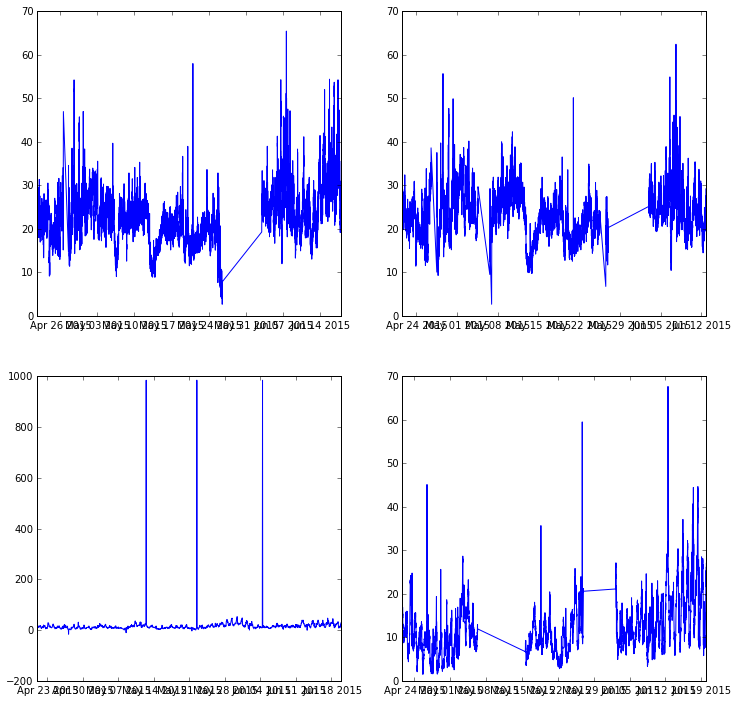

In [14]:
plt.figure(figsize=(12,12))
ax = plt.subplot(221)
ax.plot(speck1.index, speck1.speck1mass)
ax = plt.subplot(222)
ax.plot(speck2.index, speck2.speck2mass)
ax = plt.subplot(223)
ax.plot(bam.index, bam['bampm2.5'])
ax = plt.subplot(224)
ax.plot(grimm.index, grimm.grimmmass)

In [15]:
bam['bampm2.5'] = [min(x, 55) for x in bam['bampm2.5']]

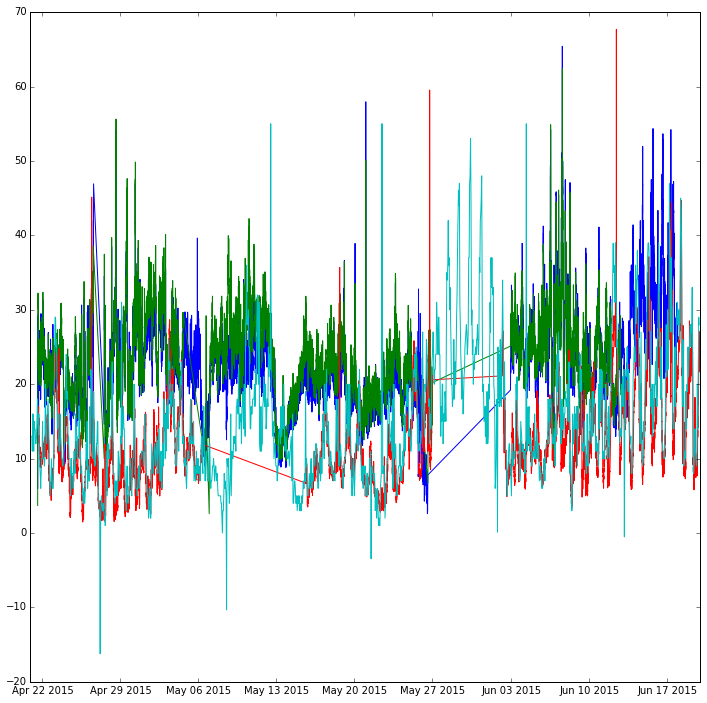

In [16]:
plt.figure(figsize=(12,12))
plt.plot(speck1.index, speck1.speck1mass)
plt.plot(speck2.index, speck2.speck2mass)
plt.plot(grimm.index, grimm.grimmmass)
plt.plot(bam.index, bam['bampm2.5'])


###Correlations sampled at 1hr BAM intervals

In [17]:
for td in range(-8, 1):
    s1 = speck1.copy()
    s2 = speck2.copy()
    s1.index = speck1.index.shift(td, freq='1h')
    s2.index = speck2.index.shift(td, freq='1h')
    joined_df = s1.join(s2, how='inner').join(grimm, how='inner').join(bam, how='inner')
    print 'Hours offset:', td
    print joined_df.corr()
    print

    

Hours offset: -8
            speck1mass  speck2mass  grimmmass  bampm2.5
speck1mass    1.000000    0.907630   0.126806  0.086473
speck2mass    0.907630    1.000000   0.132606  0.090312
grimmmass     0.126806    0.132606   1.000000  0.739924
bampm2.5      0.086473    0.090312   0.739924  1.000000

Hours offset: -7
            speck1mass  speck2mass  grimmmass  bampm2.5
speck1mass    1.000000    0.907159   0.100912  0.071710
speck2mass    0.907159    1.000000   0.120149  0.085709
grimmmass     0.100912    0.120149   1.000000  0.740781
bampm2.5      0.071710    0.085709   0.740781  1.000000

Hours offset: -6
            speck1mass  speck2mass  grimmmass  bampm2.5
speck1mass    1.000000    0.906918   0.076496  0.062130
speck2mass    0.906918    1.000000   0.099994  0.072334
grimmmass     0.076496    0.099994   1.000000  0.742113
bampm2.5      0.062130    0.072334   0.742113  1.000000

Hours offset: -5
            speck1mass  speck2mass  grimmmass  bampm2.5
speck1mass    1.000000    0.90667

###Correlations sampled at 5min frequency of GRIMM & Speck

In [18]:
for td in range(-8, 1):
    s1 = speck1.copy()
    s2 = speck2.copy()
    s1.index = speck1.index.shift(td, freq='1h')
    s2.index = speck2.index.shift(td, freq='1h')
    joined_df = s1.join(s2, how='inner').join(grimm, how='inner')
    print 'Hours offset:', td
    print joined_df.corr()
    print

Hours offset: -8
            speck1mass  speck2mass  grimmmass
speck1mass    1.000000    0.909443   0.122169
speck2mass    0.909443    1.000000   0.125776
grimmmass     0.122169    0.125776   1.000000

Hours offset: -7
            speck1mass  speck2mass  grimmmass
speck1mass    1.000000    0.909138   0.095999
speck2mass    0.909138    1.000000   0.104927
grimmmass     0.095999    0.104927   1.000000

Hours offset: -6
            speck1mass  speck2mass  grimmmass
speck1mass    1.000000    0.908915   0.066481
speck2mass    0.908915    1.000000   0.082047
grimmmass     0.066481    0.082047   1.000000

Hours offset: -5
            speck1mass  speck2mass  grimmmass
speck1mass    1.000000    0.908682   0.033757
speck2mass    0.908682    1.000000   0.052257
grimmmass     0.033757    0.052257   1.000000

Hours offset: -4
            speck1mass  speck2mass  grimmmass
speck1mass    1.000000    0.908409   0.010146
speck2mass    0.908409    1.000000   0.030741
grimmmass     0.010146    0.030741   